In [1]:
import numpy as np
from matplotlib import pyplot as plt
from module.iris_recog import *
from module.img_test import *
from module.img_process import *
from module.img_rotate import *

# Iris Rotate

In [5]:
img_num = 10
img_side = 'L'
img_take = 8

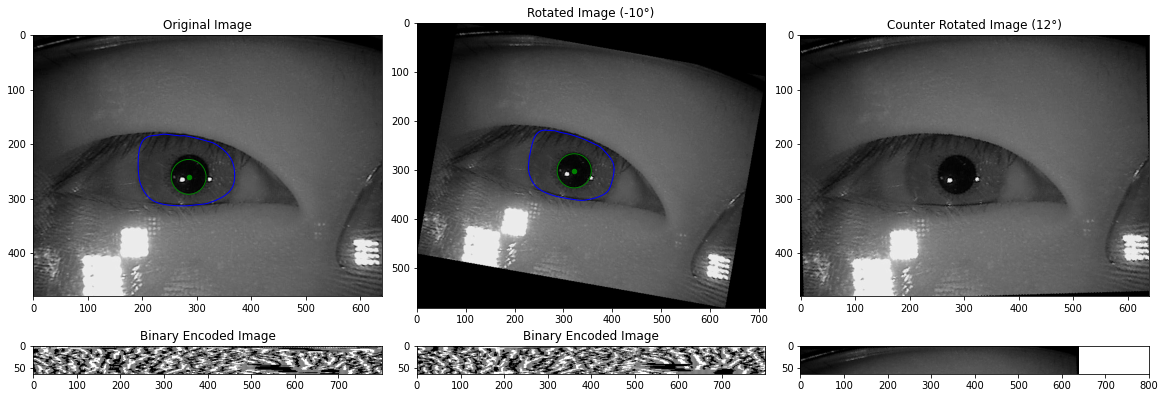

(0.39952752319690327, -10, 13)

In [3]:
process_image(img_num, img_side, img_take, True, set_angle=-10)

In [18]:
df = run_test_df_multi(process_image, 500, ['L', 'R'], 1, set_angle=30)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [19]:
# for test in range(-30, 31, 5):
#     df = test_dataframe_multiprocess(process_image, 500, ['L', 'R'], 1, set_angle=test)
#     df.to_csv(f'temp_data/iris_test_{test}.csv', index=False)

In [20]:
# df.to_csv('temp_data/iris_test_30.csv', index=False)

In [8]:
# Split the data into four NumPy arrays based on the Rotate_Category column
below_10 = df[abs(df['Rotate']) <= 10].iloc[:,4].to_numpy()
between_10_20 = df[(10 < abs(df['Rotate'])) & (abs(df['Rotate']) <= 20)].iloc[:,4].to_numpy()
between_20_30 = df[(20 < abs(df['Rotate'])) & (abs(df['Rotate']) <= 30)].iloc[:,4].to_numpy()
above_30 = df[abs(df['Rotate']) >= 30].iloc[:,4].to_numpy()

In [4]:
import matplotlib.ticker as ticker

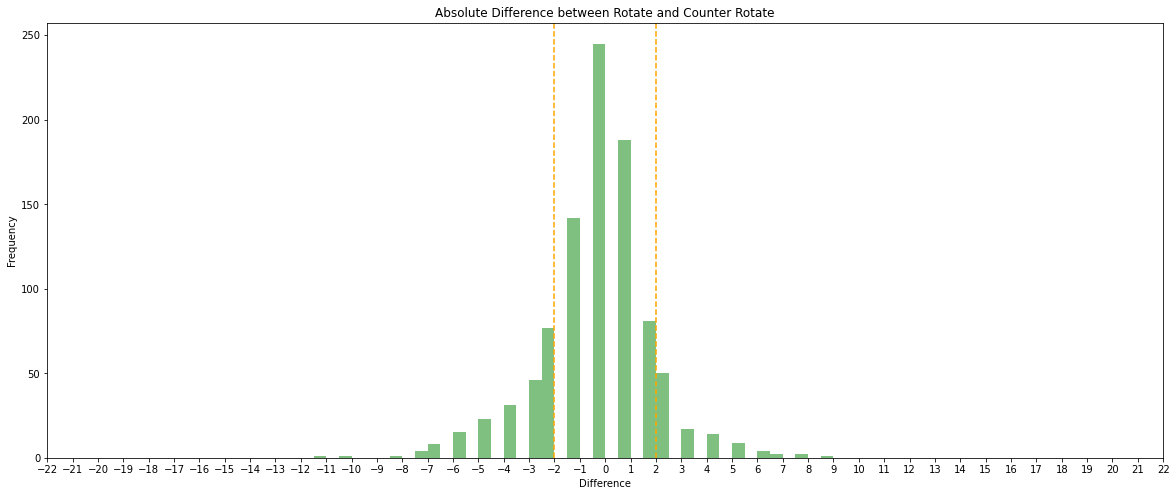

In [10]:
# Assuming the 'diff' column already exists in the 'df' DataFrame
diff_values = df['Diff'].values
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
ax.hist(diff_values, bins=80, color='g', alpha=0.5, range=(-20, 20))
ax.axvline(x=-2, color='orange', linestyle='--')
ax.axvline(x=2, color='orange', linestyle='--')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
ax.set_title('Absolute Difference between Rotate and Counter Rotate')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In [2]:
df_neg30 = pd.read_csv('temp_data/iris_test_neg30.csv')
df_neg20 = pd.read_csv('temp_data/iris_test_neg20.csv')
df_neg10 = pd.read_csv('temp_data/iris_test_neg10.csv')
df_10 = pd.read_csv('temp_data/iris_test_10.csv')
df_20 = pd.read_csv('temp_data/iris_test_20.csv')
df_30 = pd.read_csv('temp_data/iris_test_30.csv')

In [15]:
dfs = [df_neg30, df_neg20, df_neg10, df_10, df_20, df_30]
df_names = ['-30', '-20', '-10', '10', '20', '30']

for i, df in enumerate(dfs):
    abs_diff = np.abs(df['Diff'])
    mean = round(abs_diff.mean(), 2)
    std_dev = round(abs_diff.std(), 2)
    print(f"{df_names[i]}:\n Mean: {mean}\n Standard Deviation: {std_dev}")

-30:
 Mean: 5.25
 Standard Deviation: 21.93
-20:
 Mean: 5.19
 Standard Deviation: 22.9
-10:
 Mean: 5.04
 Standard Deviation: 22.73
10:
 Mean: 4.39
 Standard Deviation: 20.99
20:
 Mean: 5.57
 Standard Deviation: 23.52
30:
 Mean: 5.81
 Standard Deviation: 22.92


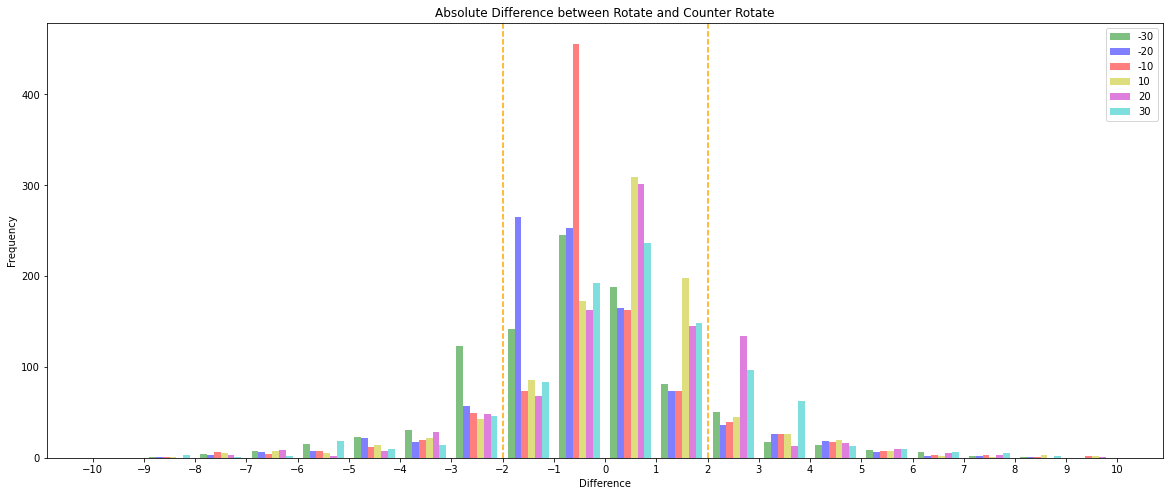

In [5]:
# Assuming the four NumPy arrays are named below_10, between_10_20, between_20_30, and above_30
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

ax.hist([df_neg30['Diff'].values, df_neg20['Diff'].values, df_neg10['Diff'].values, df_10['Diff'].values, df_20['Diff'].values, df_30['Diff'].values],
        bins=20, 
        color=['g', 'b', 'r', 'y', 'm', 'c'], 
        alpha=0.5, 
        range=(-10, 10), 
        label=['-30', '-20', '-10', '10', '20', '30'])

ax.axvline(x=-2, color='orange', linestyle='--')
ax.axvline(x=2, color='orange', linestyle='--')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
ax.set_title('Absolute Difference between Rotate and Counter Rotate')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()
plt.show()

# Eye Rotate

## Method 1

In [2]:
from module.eye_recog import *

In [6]:
img_ref = read_image(
        f'C:/Users/jimyj/Desktop/TAIST/Thesis/Source_Code/main/Iris-Dataset/CASIA-Iris-Thousand/{str(img_num).zfill(3)}/{img_side}/S5{str(img_num).zfill(3)}{img_side}{str(img_take).zfill(2)}.jpg')
img_rot, angle = rotate_image(Image.fromarray(img_ref))
imgs = [img_ref, img_rot]

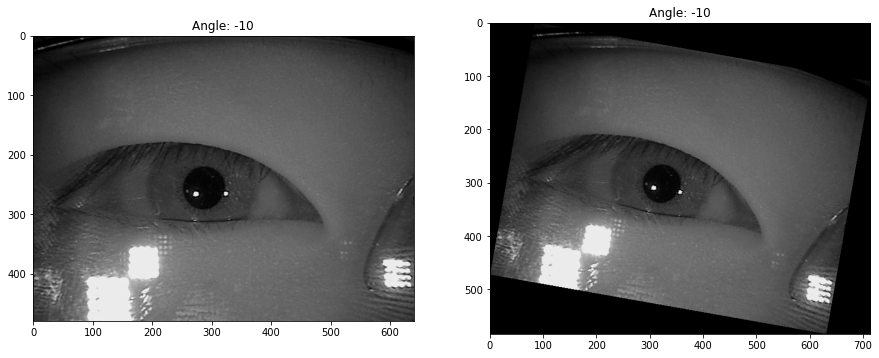

In [7]:
plt.figure(figsize=(15, 8))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(f'Angle: {angle}')

In [8]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import torch

In [10]:
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())

PyTorch version: 1.10.1+cu113
CUDA version: 11.3
cuDNN version: 8200


In [11]:
gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
gpu

device(type='cuda', index=0)

In [20]:
from module.irislandmarks import IrisLandmarks

net = IrisLandmarks().to(gpu)
net.load_weights("model/irislandmarks.pth")

In [21]:
img_num = 1
img_side = 'R'
img_take = 1

In [22]:
img = cv2.imread(f'C:/Users/jimyj/Desktop/TAIST/Thesis/Source_Code/main/Iris-Dataset/CASIA-Iris-Thousand/{str(img_num).zfill(3)}/{img_side}/S5{str(img_num).zfill(3)}{img_side}{str(img_take).zfill(2)}.jpg')
img, angle = rotate_image(Image.fromarray(img))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (64, 64))

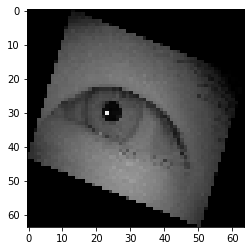

In [23]:
plt.imshow(img)

In [24]:
eye_gpu, iris_gpu = net.predict_on_image(img)
eye = eye_gpu.cpu().numpy()
iris = iris_gpu.cpu().numpy()
eye.shape
iris.shape

(1, 5, 3)

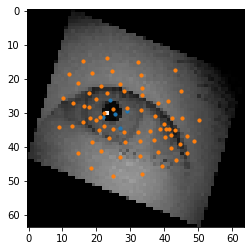

In [25]:
plt.imshow(img, zorder=1)
plt.scatter(iris[:, :, 0], iris[:, :, 1], zorder=2, s=10)
plt.scatter(eye[:, :, 0], eye[:, :, 1], zorder=2, s=10)
plt.show()

## Method 2

In [34]:
from module.mediapipe_eye import *

In [41]:
img_num = 10
img_take = 0
file_loc = 'C:/Users/jimyj/Desktop/TAIST/Thesis/Source_Code/main/Iris-Dataset/CASIA-Iris-Thousand/'

In [42]:
img = img_read(file_loc, img_num, img_take)

In [46]:
img = cv2.imread('image/peri_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

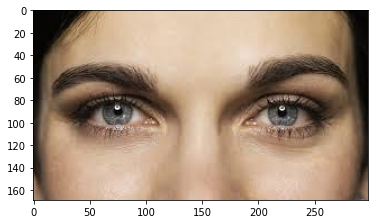

In [47]:
plt.imshow(img)

In [48]:
eye = detect_eye(img)

In [49]:
draw_eye(img, eye)

## Method 3

In [ ]:
eye_cascade = cv2.CascadeClassifier('model/haarcascade_eye.xml')

In [ ]:
img_num = 1
img_take = 8
file_loc = 'C:/Users/jimyj/Desktop/TAIST/Thesis/Source_Code/main/Iris-Dataset/CASIA-Iris-Thousand/'

In [ ]:
img = img_read(file_loc, img_num, img_take, "L")

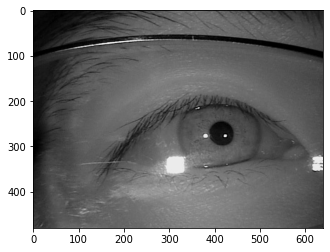

In [ ]:
plt.imshow(img)

In [ ]:
eyes = eye_cascade.detectMultiScale(img)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

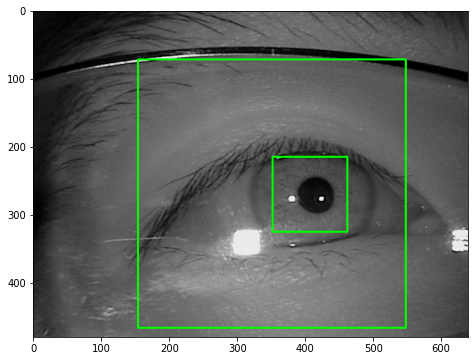

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.imshow(img)

## Method 4

In [16]:
from module.densenet_seg.test import *

### Image Segmentation

In [17]:
img_num = 6
img_take = 9
file_loc = 'C:/Users/jimyj/Desktop/TAIST/Thesis/Source_Code/main/Iris-Dataset/CASIA-Iris-Thousand/'

In [18]:
image_path = f'{file_loc}{str(img_num).zfill(3)}/L/S5{str(img_num).zfill(3)}L{str(img_take).zfill(2)}.jpg'
img_rot, angle = rotate_image(Image.fromarray(read_image(image_path)), expand=False)
# img_rot.resize((480, 640))

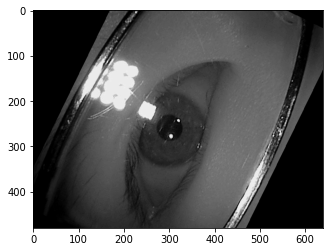

In [19]:
plt.imshow(img_rot, cmap='gray')

In [20]:
model_name = 'densenet'
model_path = 'model/densenet_seg.pkl'

In [21]:
img, img_seg = run_prediction(img_rot, model_name, model_path, use_gpu=True)

In [22]:
# img_seg_filtered = cv2.medianBlur(img_seg, ksize=5)

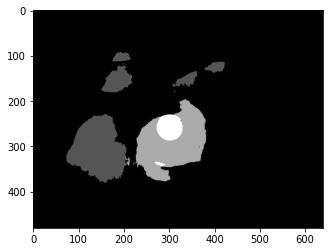

In [23]:
plt.imshow(img_seg, cmap='gray')

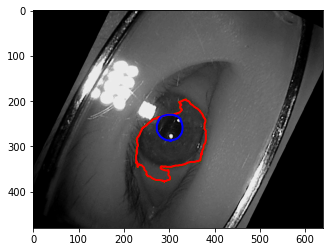

In [24]:
from skimage import measure

# Assuming img_seg is your image array
contours_eye = np.array([max(measure.find_contours(img_seg, 0.3), key=len)])
contours_iris = np.array([max(measure.find_contours(img_seg, 0.6), key=len)])
contours_pupil = np.array([max(measure.find_contours(img_seg, 0.9), key=len)])

# Draw the contours on the original image
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

for contour in contours_eye:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='green')
for contour in contours_iris:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')
for contour in contours_pupil:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='blue')

### Enclose with cirlce

In [12]:
def enclose_with_circle(contour):
    (y, x), rad = cv2.minEnclosingCircle(np.array(contour[0], dtype=np.float32))

In [13]:
def plot_seg_eye(img, contours_eye, contour_iris, x, y, rad):
    fig, ax = plt.subplots(figsize=(8, 4))
    # Plot the image
    plt.imshow(img, cmap='gray')

    # Plot the eye contours
    for contour in contours_eye:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color='green')

    # Plot the iris contour
    plt.plot(contour_iris[:, 1], contour_iris[:, 0], linewidth=2, color='red')

    # Plot the circle around the pupil
    circle = plt.Circle((x, y), rad, color='blue', fill=False)
    plt.gca().add_artist(circle)

    # Show the plot
    plt.show()

In [14]:
(y, x), rad = cv2.minEnclosingCircle(np.array(contours_pupil[0], dtype=np.float32))
contour_iris =  contours_iris[0,:,:].astype(int)

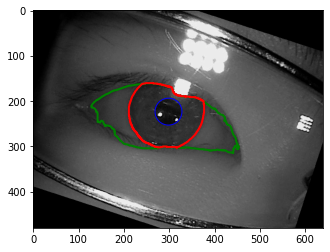

In [15]:
plot_seg_eye(img, contours_eye, contour_iris, x, y, rad)

In [16]:
def plot_pupil_eye(img, x, y, rad):
    fig, ax = plt.subplots(figsize=(8, 4))
    # Plot the image
    plt.imshow(img, cmap='gray')

    # Plot the circle around the pupil
    circle_pupil = plt.Circle((x, y), rad, color='blue', fill=False, linewidth=2)
    plt.gca().add_artist(circle_pupil)
    
    circle_eye = plt.Circle((x, y), rad*7, color='green', fill=False, linewidth=2)
    plt.gca().add_artist(circle_eye)

    # Show the plot
    plt.show()

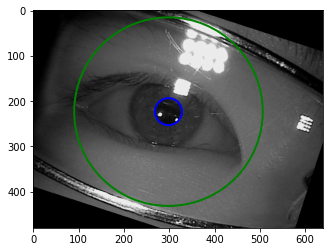

In [17]:
plot_pupil_eye(img, x, y, rad)

In [18]:
circle_pupil = (int(x), int(y), int(rad))
circle_eye = (int(x), int(y), int(rad*7))

In [19]:
eye_norm, map_area = normalization_eye(img, circle_pupil, circle_eye, M=128, N=800)

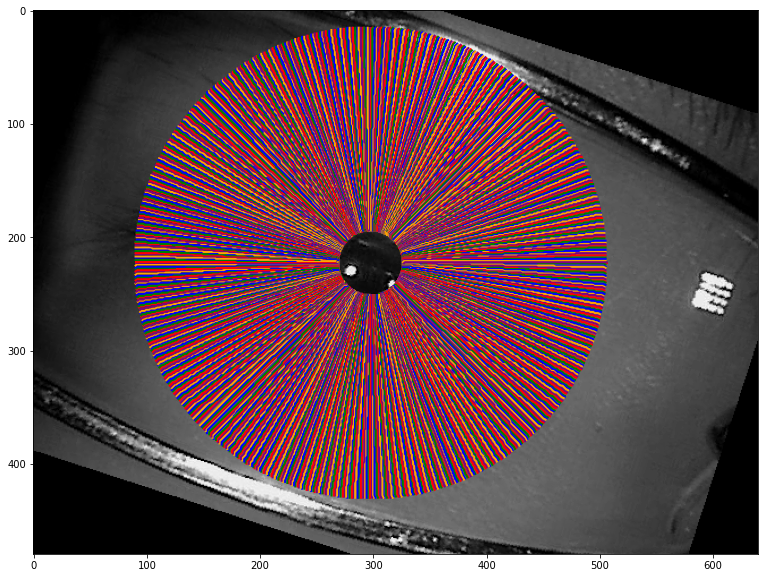

In [20]:
plot_norm_map(img, map_area)

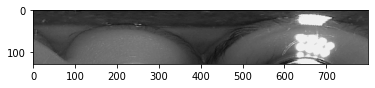

In [21]:
plt.imshow(eye_norm, cmap='gray')

### Final process

c:\Users\jimyj\Desktop\TAIST\Tokyo Tech Exchange\module\iris_recog.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return normalized, np.array(map_area)


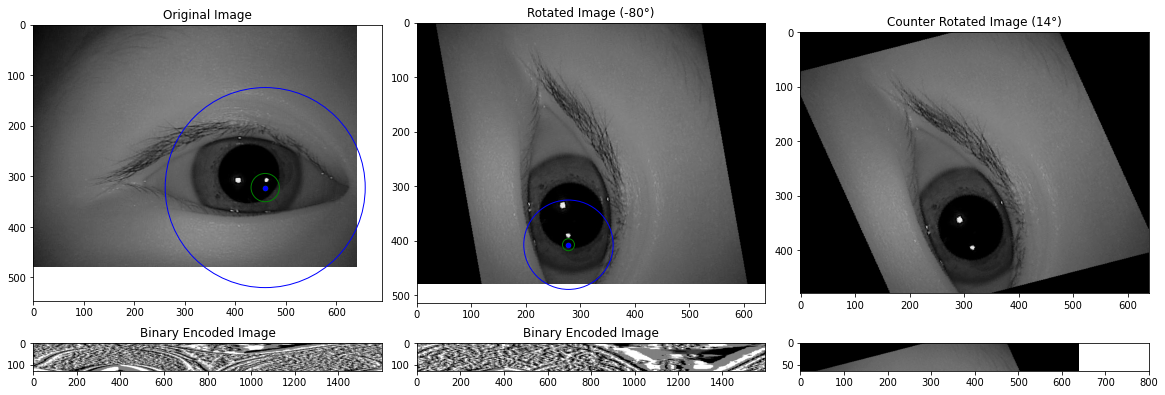

(0.48904786525344524, -80, 32)

In [25]:
process_eye(296, 'L', 2, True)

In [32]:
df = run_test_df(process_eye, 250, ['L', 'R'], 1, 800, set_angle=-30)

  0%|          | 0/250 [00:00<?, ?it/s]

c:\Users\jimyj\Desktop\TAIST\Tokyo Tech Exchange\module\iris_recog.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return normalized, np.array(map_area)


In [33]:
df.head()

,Hamming Distance,Rotate,Shift,Counter Rotate,Diff
0,0.343115,-30,67,30.15,0.15
1,0.296919,-30,67,30.15,0.15
2,0.311589,-30,67,30.15,0.15
3,0.315576,-30,67,30.15,0.15
4,0.363022,-30,67,30.15,0.15


In [34]:
df.to_csv('temp_data/eye_test_neg30.csv', index=False)

In [35]:
df_neg30 = pd.read_csv('temp_data/eye_test_neg30.csv')
df_neg20 = pd.read_csv('temp_data/eye_test_neg20.csv')
df_neg10 = pd.read_csv('temp_data/eye_test_neg10.csv')
df_10 = pd.read_csv('temp_data/eye_test_10.csv')
df_20 = pd.read_csv('temp_data/eye_test_20.csv')
df_30 = pd.read_csv('temp_data/eye_test_30.csv')

In [37]:
dfs = [df_neg30, df_neg20, df_neg10, df_10, df_20, df_30]
df_names = ['-30', '-20', '-10', '10', '20', '30']

for i, df in enumerate(dfs):
    abs_diff = np.abs(df['Diff'])
    mean = round(abs_diff.mean(), 2)
    std_dev = round(abs_diff.std(), 2)
    print(f"{df_names[i]}:\n Mean: {mean}\n Standard Deviation: {std_dev}")

-30:
 Mean: 0.83
 Standard Deviation: 6.06
-20:
 Mean: 0.65
 Standard Deviation: 4.74
-10:
 Mean: 0.36
 Standard Deviation: 4.03
10:
 Mean: 0.58
 Standard Deviation: 5.95
20:
 Mean: 0.34
 Standard Deviation: 1.06
30:
 Mean: 0.51
 Standard Deviation: 4.31


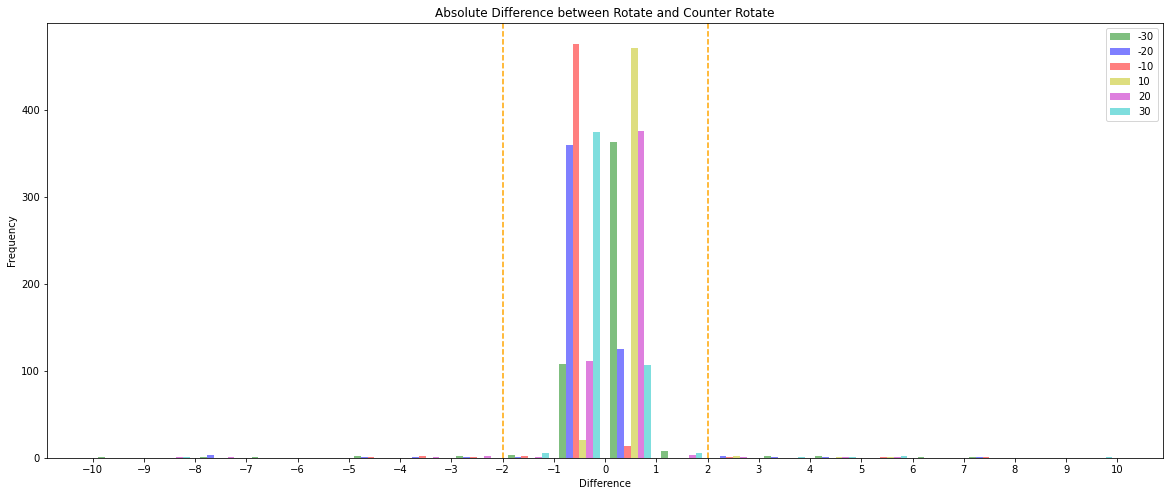

In [36]:
# Assuming the four NumPy arrays are named below_10, between_10_20, between_20_30, and above_30
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

ax.hist([df_neg30['Diff'].values, df_neg20['Diff'].values, df_neg10['Diff'].values, df_10['Diff'].values, df_20['Diff'].values, df_30['Diff'].values],
        bins=20, 
        color=['g', 'b', 'r', 'y', 'm', 'c'], 
        alpha=0.5, 
        range=(-10, 10), 
        label=['-30', '-20', '-10', '10', '20', '30'])

ax.axvline(x=-2, color='orange', linestyle='--')
ax.axvline(x=2, color='orange', linestyle='--')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
ax.set_title('Absolute Difference between Rotate and Counter Rotate')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()
plt.show()

## Iris Normalization

### Using New Localization Method (Fast)

In [32]:
# Define the number of points to interpolate to
N = 400

In [33]:
contour_iris_inter = interpolate_pixel(contour_iris, 400)
contour_pupil_inter = interpolate_pixel(contours_pupil[0], 400)

In [34]:
iris_norm_test, map_area = normalization_seg(img, contour_pupil_inter, contour_iris_inter)

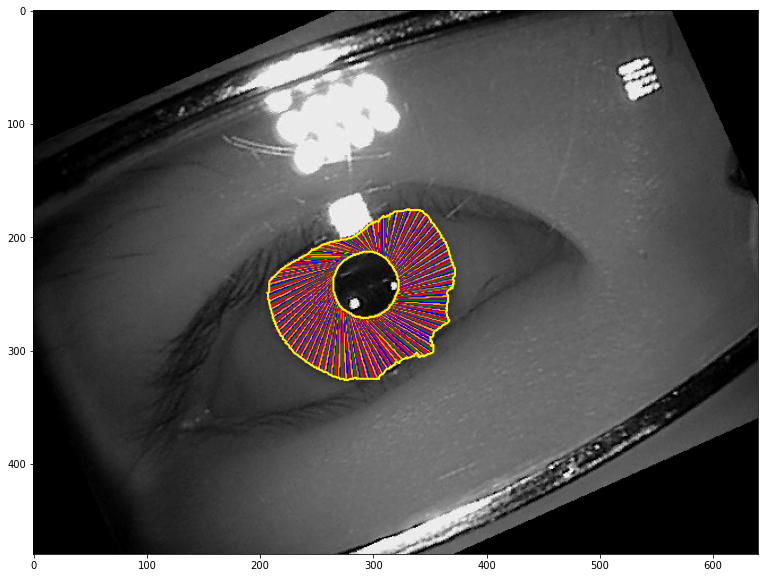

In [35]:
plot_norm_map(img, np.flip(map_area, axis=2), [contour_iris_inter, contour_pupil_inter])

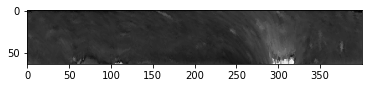

In [36]:
plt.imshow(iris_norm_test, cmap='gray')

### Using Old Localization Method (Slow)

In [47]:
_, snake, circle = localization(np.array(img_seg*255).astype('uint8'))

In [48]:
iris_circle = np.flip(np.array(snake).astype(int), 1)

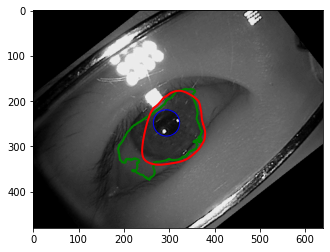

In [49]:
plot_seg_eye(img, contours_eye, snake, circle[0], circle[1], circle[2])

In [51]:
iris_norm_test, map_area_test = normalization(img, circle, iris_circle)

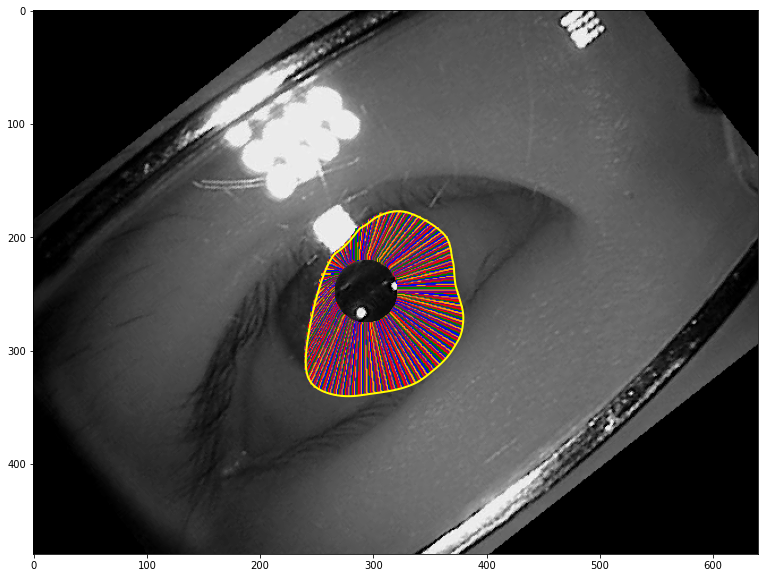

In [54]:
plot_norm_map(img, map_area_test, [snake])

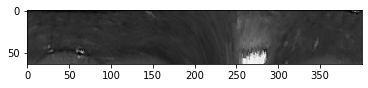

In [55]:
plt.imshow(iris_norm_test, cmap='gray')